# Week 3 Study
Topic: Monte Carlo Simulation of P300 Speller Performance with A Generic BCI algorithms

## The General Process of How ERP-based Spellers Work

A user is presented with a set of choices, $\{C_m\}^M_{m=1}$ , one of which is assumed to be the user's desired or target character during a selection process. Electrodes are used to acquire EEG signals, which are amplified, filtered and digitized for further processing.

To select a target character, $C^*$ , the user focuses on that character as subsets of characters, $\mathcal{F_t} \sub \{C_m\}^M_{m=1}$ , are randomly presented, where $t$ denotes the time index. For example, for the row-column paradigm (RCP), the flash groups are the rows and columns of a grid, presented in a random order without replacement.

<center><img src="Image/screen_display.jpg" style="zoom:100%;"></center>

<caption><center><b>Figure 1</b>: User interface of the RC Paradigm (Farwell and Donchin, 1988) </font></center></caption>

Following each stimulus presentation, the user's EEG response to the stimulus is scored with the system's classifier. Time windows of EEG data from select electrodes are processed to extract relevant features that convey the user's intent. These features are scored with a user-specific classifier to obtain a classifier score, $y_t$.

The classifier score is used to update a function that quantifies the possibility of each of the BCI choices to be the user's target choice given data collection. We denote this function as the character cumulative response function (CCRF), $\{\Theta_m(t)\}^M_{m=1}$, for an M-choice BCI.

For the P300 speller, $\Theta_m(t) = g(C_m, \boldsymbol{F_t}, \mathbf{Y_t})$, represents a measure of the possibility of character, $C_m$, of being the target character, given a series of stimulus event presentations, $\boldsymbol{F_t}=[\mathcal{F_1}, \mathcal{F_2}, ..., \mathcal{F_t}]$ and classifier score responses, $\mathbf{Y_t} = [y_1, y_2, ..., y_t]$. Based on the literature, $\Theta_m(t)$ is usually a cumulative score or a probability value.

<center><img src="Image/total_score.jpg" style="width:600px;height:350px;"></center>

<caption><center><b>Figure 2</b>: Using Cumulative Score as the CCRF (Farwell and Donchin, 1988) </font></center></caption>

The BCI collects data and terminates data collection at a stopping time, $t_s$, based on a stopping rule that can either be static (SS) or dynamic (DS). In SS, a fixed amount of data is collected, i.e. $t_s = t_{max}$. In DS, the amount of data collection is varied, i.e. $1 \leq t_s \leq t_{max}$, based on a threshold function; usually when the maximum CCRF value attains a pre-set threshold value, $\Theta_{th}$. For practical reasons, a data collection limit is imposed when using a DS algorithm as convergence to the stopping threshold is not always guaranteed in order to make a selection within a reasonable amount of time.

In this study, within the context of data collection, we define a **sequence** as a unit of data collection which consists of the number of defined flash groups in the base pattern of a stimulus presentation paradigm. For example, for the RCP with an $R \times C$ grid, 1 sequence = $R+C$ flashes and $t_{max} = s \times (R+C)$ flashes, where $s$ is the sequence limit.

When data collection is stopped, the BCI makes a selection based on a decision rule to estimate the user's target character, $\hat{C*}$, which is usually the character that maximizes the CCRF.



<center><img src="Image/framework.jpg" style="zoom:60%;"></center>

<caption><center><b>Figure 3</b>: The framework of the Generalized ERP-based Speller (Mainsah et al., 2016) </font></center></caption>

A user's performance with a BCI algorithm is generally characterized by two measures: the stopping time and accuracy Performance functions can be derived based on the stopping and decision rules, respectively. The expected stopping time ($EST$) is the average number of stimulus event presentations prior to making a decision. With a SS criterion, the amount of data collection is fixed. With a DS criterion, data collection is stopped when any character's cumulative response attains the pre-set threshold value, $\Theta_{th}$, or the data collection limit is attained, $t_{max}$.

The accuracy, $A$, is the average probability that the BCI correctly selects the target character after data collection is stopped. The BCI correctly selects the target character if at $t_s$, the target character's cumulative response value exceeds that of all the non-target characters, or exceeds the maximum response of the non-target characters.

## The Bayesian DS algorithm

The CCRF is a probability distribution $\{P_m(t)\}^M_{m=1}$, which is maintained over the characters. With each stimulus event presentation, new evidence is incorporated into the model via Bayesian inference to update the character probabilities. Data collection is stopped when a character's probability attains a threshold value, $P_{th}$, within a data collection limit.

During training, we will derive the probability density function of the classifier score $y_i$ under the condition that it is the target and non-target respectively, ie, $p(y|H_0)$ and $p(y|H_1)$.

<center><img src="Image/cond_distribution.jpg" style="zoom:60%;"></center>
<caption><center><b>Figure 4</b>: The conditional PDF of H0 and H1 (Mainsah et al., 2016) </font></center></caption>

Prior to data collection, character probabilities are initialized, $P_m(0) = P(C_m = C^*|\mathbf{Y_0}, \mathcal{F_0})$, indicating the initial confidence level that each character, $C_m$, is the target character, $C^*$. After each stimulus event presentation, the classifier score, $y_t$, is used to update the character probabilities:

$$
P(C_m = C^*|\mathbf{Y_t}, \mathcal{F_t}) = \frac{P(C_m = C^*|\mathbf{Y_{t-1}}, \mathcal{F_{t-1}})p(y_t|C_m = C^*, \mathcal{F_t})}{\sum^M_{j=1}P(C_j = C^*|\mathbf{Y_{t-1}}, \mathcal{F_{t-1}})p(y_t|C_j = C^*, \mathcal{F_t})}
$$

The likelihood, $(y_t|C_m = C^*, \mathcal{F_t})$, for each character is set depending on whether the character is in the current flashed subset:

$$
p(y_t|C_m = C^*, \mathcal{F_t}) = \left\{
\begin{align*}
      & p(y_t|H_0) & (C_m \notin \mathcal{F_t}) \\
      & p(y_t|H_1) & (C_m \in \mathcal{F_t}) \\
\end{align*} 
\right.
$$

The stopping time, $t_s$, is either when a character probability attains the threshold value (set at $P_{th} = 0.9$ or $t_{max}$ is reached. The character with the highest probability after data collection is selected as the user's intended target character, $\hat{C^*} = \argmax P_m(t_s)$.

## My Simulation

| Input                      | Meaning                                                      |
| -------------------------- | ------------------------------------------------------------ |
| $N$                        | Number of iterations.                                        |
| $\{P(C_m = C^*)\}^M_{m=1}$ | Prior probability distribution on characters $C^*$.          |
| $\{\Theta_m(t)\}^M_{m=1}$  | Cumulative classifier response function, which quantifies the possibility that each character is the target character, <br /> given all of the user's responses. |
| $p(y\|H_0)$, $p(y\|H_1)$   | Class conditional classifier score likelihood, determining the random sampling of the classifier scores in the case of a <br /> non-target or a target response, respectively. |
| $\mathcal{F}$              | Sequence flash pattern, determining the characters in each flash group and the order of flash group presentation. |
| $s$                        | Maximum number of sequences (if applicable).                 |
| $\Theta_{th}$              | Stopping threshold.                                          |

Output:
- $\hat{A}$ = Accuracy,
- $\widehat{EST}$ = Expected Stopping Time.

In [19]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
from typing import List
import scipy.integrate as integrate

In [16]:
def visualize_codebook(board:List[List[str]], codebook:List[int]):
    '''
    Visualize the codebook into an image of matrix.
    '''
    num_all_choices = len(board[0]) * len(board)
    num_choices_per_row = len(board[0])
    num_choices_per_col = len(board)
    num_seq = len(codebook)
    display = np.zeros(shape=(num_all_choices, num_seq))
    for t in range(num_seq):
        if (codebook[t] < 6): # a row is flashed
            flashed_row = codebook[t]
            start = num_choices_per_row * flashed_row
            display[start : start + num_choices_per_row, t] = 1
        else: # a column is flashed
            flashed_col = codebook[t] - 6
            start = codebook[t] - 6
            for i in range(num_choices_per_col):
                display[start + i * num_choices_per_row, t] = 1
    plt.figure(figsize=(6,6))
    plt.yticks(ticks=np.arange(stop=num_all_choices),
               labels=np.array(board).transpose().flatten())
    plt.xticks(ticks=np.arange(stop=num_seq), labels=np.arange(stop=num_seq)+1)
    plt.title('Stimulus Codebook for the RCP')
    plt.imshow(display, cmap='gray', vmin=0, vmax=1, aspect='auto')

In [3]:
# Initialization
board = np.array([['A', 'G', 'M', 'S', 'Y',   '*'   ],
                  ['B', 'H', 'N', 'T', 'Z',   '*'   ],
                  ['C', 'I', 'O', 'U', '*',   'TALK'],
                  ['D', 'J', 'P', 'V', 'FLN', 'SPAC'],
                  ['E', 'K', 'G', 'W', '*',   'BKSP'],
                  ['F', 'L', 'R', 'X', 'SPL', 'QUIT']])
n_rows = board.shape[0]
n_cols = board.shape[1]
num_seq= n_rows + n_cols
seq = [i for i in range(num_seq)]
s = 10 # sequence_limit
t_max = s * num_seq # the maximum time for data collection (number of trials)
N = 100 # number of iterations (one epoch per iteration)
M = n_rows * n_cols # the amount of possible choices
target_loc = (1,0)
P_all = np.ones(shape=(n_rows, n_cols)) * (1/M)
P_threshold = 0.9
F = [random.sample(seq, len(seq)) for _ in range(s)] # stimulus codebook

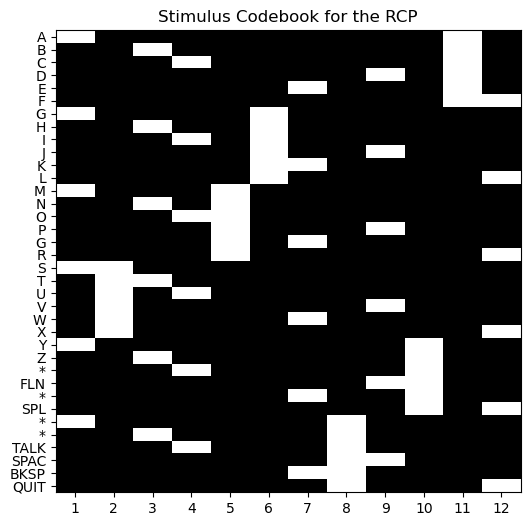

In [17]:
visualize_codebook(board=board, codebook=F[0])

In [6]:
F = [[1 for i in range(num_seq)] for _ in range(s)]

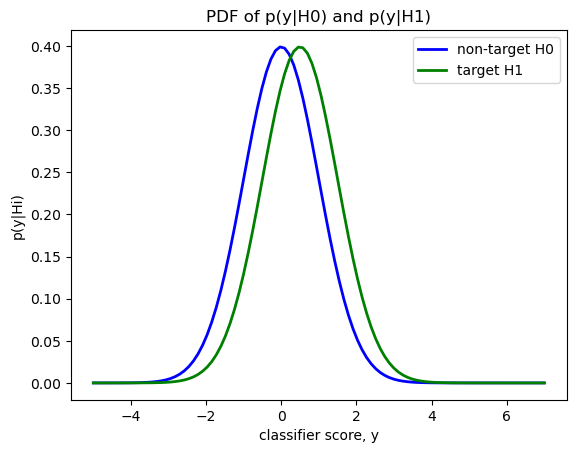

In [7]:
# Visualize the PDF curve for p(y|H0) and p(y|H1) respectively
mu_0 = 0  # mean for p(y|H0) distribution
var_0 = 1 # variance for p(y|H1) distribution
std_0 = math.sqrt(var_0) # std for p(y|H0) distribution
mu_1 = 0.5
var_1 = 1
std_1 = math.sqrt(var_1)
x = np.linspace(-5, 7, 100)
plt.plot(x, stats.norm.pdf(x, mu_0, std_0), lw=2, c='blue')
plt.plot(x, stats.norm.pdf(x, mu_1, std_1), lw=2, c='green')
plt.title('PDF of p(y|H0) and p(y|H1)')
plt.xlabel('classifier score, y')
plt.ylabel('p(y|Hi)')
plt.legend(labels=['non-target H0', 'target H1'])
plt.show()

In [8]:
trial_times = 0
num_flashed_rows = 0
num_flashed_cols = 0
for t in range(t_max):
    trial_times += 1
    # Flash a row or column
    flashed = F[t // num_seq][t % num_seq]
    flashed_row = flashed if flashed < 6 else -1
    flashed_col = flashed - 6 if flashed_row == -1 else -1
    if flashed_row != -1:
        num_flashed_rows += 1
    else:
        num_flashed_cols += 1
    # Randomly sample y from one of the two PDFs
    if (target_loc[0] == flashed_row or target_loc[1] == flashed_col):
        y = np.random.normal(loc=mu_1, scale=std_1)
    else:
        y = np.random.normal(loc=mu_0, scale=std_0)
    # Update probabilities
    for i in range(n_rows):
        for j in range(n_cols):
            if (i == flashed_row or j == flashed_col):
                likelihood = stats.norm.pdf(x=y, loc=mu_1, scale=std_1)
            else:
                likelihood = stats.norm.pdf(x=y, loc=mu_0, scale=std_0)
            P_all[i, j] = P_all[i, j] * likelihood
    # Normalize P_all
    P_all = P_all / P_all.sum()
    # Check if can stop
    if P_all.max() >= P_threshold:
        break

print(f'It takes {trial_times} trials to stop.')
max_loc = np.unravel_index(P_all.argmax(), P_all.shape)
print(f'The estimated choice C* is {board[max_loc]} with probability of {P_all[max_loc]}')
print(f'For reference, the probability of the true target {board[target_loc]} is {P_all[target_loc]}')

It takes 120 trials to stop.
The estimated choice C* is B with probability of 0.16666666665940025
For reference, the probability of the true target B is 0.16666666665940025


In [9]:
# Initialization
board = np.array([['A', 'G', 'M', 'S', 'Y',   '*'   ],
                  ['B', 'H', 'N', 'T', 'Z',   '*'   ],
                  ['C', 'I', 'O', 'U', '*',   'TALK'],
                  ['D', 'J', 'P', 'V', 'FLN', 'SPAC'],
                  ['E', 'K', 'G', 'W', '*',   'BKSP'],
                  ['F', 'L', 'R', 'X', 'SPL', 'QUIT']])
n_rows = board.shape[0]
n_cols = board.shape[1]
num_seq= n_rows + n_cols
seq = [i for i in range(num_seq)] # 0~5 are row 0~5, 6~11 are col 0~5
s = 10 # sequence_limit
t_max = s * num_seq # the maximum time for data collection (number of trials)
N = 100 # number of iterations (one epoch per iteration)
M = n_rows * n_cols # the amount of possible choices
target_loc = (1,0)
P_all = np.ones(shape=(n_rows, n_cols)) * (1/M)
P_target = []
P_threshold = 0.9

# Initailize means and stds for p(y|H0) and p(y|H1)
mu_0 = 0  # mean for p(y|H0) distribution
var_0 = 1 # variance for p(y|H1) distribution
std_0 = math.sqrt(var_0) # std for p(y|H0) distribution
mu_1 = 0
var_1 = 1
std_1 = math.sqrt(var_1)

# Run the simulation
accuracies = []
stopping_times = []
means = np.linspace(0, 5, 51)
detectabilities = (means - mu_0) / (math.sqrt((var_1 + var_0)/2))
for mean in means:
    mu_1 = mean
    n_hit = 0
    trial_times = 0
    for epoch in range(N):
        F = [random.sample(seq, len(seq)) for _ in range(s)] # stimulus codebook
        P_all = np.ones(shape=(n_rows, n_cols)) * (1/M)
        for t in range(t_max):
            trial_times += 1
            # Flash a row or column
            flashed = F[t // num_seq][t % num_seq]
            flashed_row = flashed if flashed < 6 else -1
            flashed_col = flashed - 6 if flashed_row == -1 else -1
            # Randomly sample y from one of the two PDFs
            if (target_loc[0] == flashed_row or target_loc[1] == flashed_col):
                y = np.random.normal(loc=mu_1, scale=std_1)
            else:
                y = np.random.normal(loc=mu_0, scale=std_0)
            # Update probabilities
            for i in range(n_rows):
                for j in range(n_cols):
                    if (i == flashed_row or j == flashed_col):
                        likelihood = stats.norm.pdf(x=y, loc=mu_1, scale=std_1)
                    else:
                        likelihood = stats.norm.pdf(x=y, loc=mu_0, scale=std_0)
                    P_all[i, j] = P_all[i, j] * likelihood
            # Normalize P_all
            P_all = P_all / P_all.sum()
            # Check if can stop
            if P_all.max() >= P_threshold:
                break
        max_loc = np.unravel_index(P_all.argmax(), P_all.shape)
        if (max_loc == target_loc):
            n_hit += 1
    accuracies.append(n_hit / N)
    stopping_times.append(trial_times / N)

Text(3.8, 0.85, 'threshold P = 0.9')

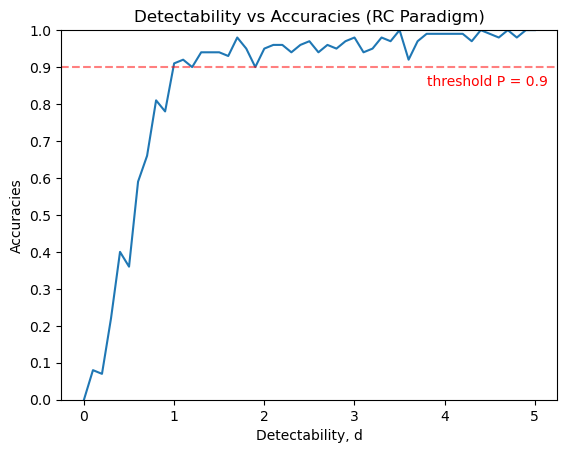

In [10]:
plt.plot(detectabilities, accuracies)
plt.title('Detectability vs Accuracies (RC Paradigm)')
plt.gca().set_ylim([0,1])
plt.yticks(ticks=[0.1*i for i in range(11)])
plt.xlabel('Detectability, d')
plt.ylabel('Accuracies')
plt.axhline(y=0.9, color='r', alpha=0.5, linestyle='--')
plt.text(x=3.8, y=0.85, s='threshold P = 0.9', color='r')

Text(3.8, 114, 't_max = 120')

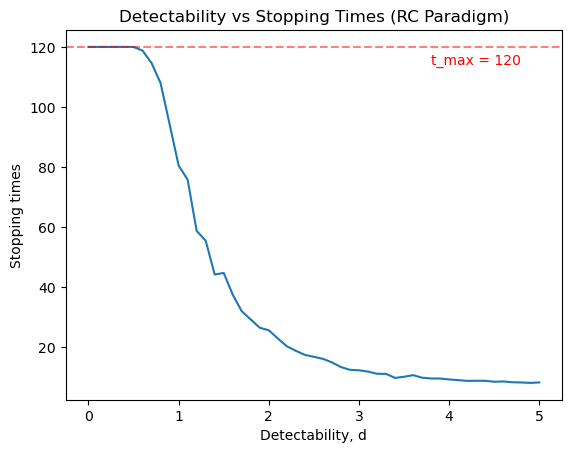

In [11]:
plt.plot(detectabilities, stopping_times)
plt.title('Detectability vs Stopping Times (RC Paradigm)')
plt.xlabel('Detectability, d')
plt.ylabel('Stopping times')
plt.axhline(y=120, color='r', alpha=0.5, linestyle='--')
plt.text(x=3.8, y=114, s='t_max = 120', color='r')

## Analytical Analysis

In [72]:
analytical_accuracy = []

def calculate_Pj(t:float, mu_0:float, mu_1:float, sigma:float, J:float):
    cdf_value = stats.norm.cdf(x=(t-mu_0)/sigma, loc=0, scale=1)
    pdf_value = stats.norm.pdf(x=(t-mu_1)/sigma, loc=0, scale=1)
    return (1/sigma) * math.pow(cdf_value, J-1) * pdf_value

for d in detectabilities:
    mu_0 = -d**2 / 2
    mu_1 = d**2 / 2
    sigma = max(d, 0.0001) / math.sqrt(s)
    R = n_rows
    C = n_cols
    P_R = integrate.quad(lambda t: calculate_Pj(t,mu_0,mu_1,sigma,R),
                         a=-np.inf, b=+np.inf)[0]
    P_C = integrate.quad(lambda t: calculate_Pj(t,mu_0,mu_1,sigma,C),
                         a=-np.inf, b=+np.inf)[0]
    analytical_accuracy.append(P_R * P_C)

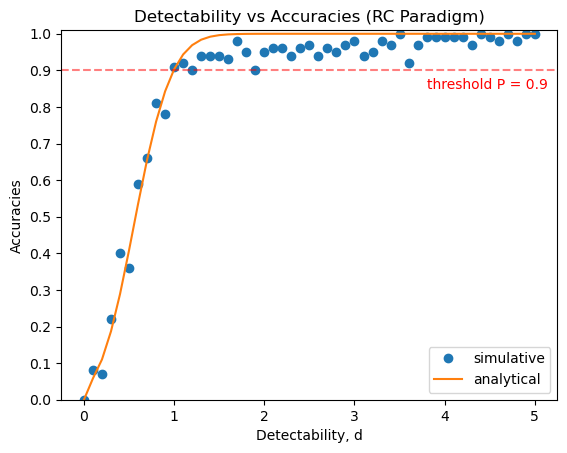

In [73]:
plt.subplot()
plt.plot(detectabilities, accuracies, 'o', label='simulative')
plt.plot(detectabilities, analytical_accuracy, label='analytical')
plt.title('Detectability vs Accuracies (RC Paradigm)')
plt.gca().set_ylim([0,1.01])
plt.yticks(ticks=[0.1*i for i in range(11)])
plt.xlabel('Detectability, d')
plt.ylabel('Accuracies')
plt.axhline(y=0.9, color='r', alpha=0.5, linestyle='--')
plt.text(x=3.8, y=0.85, s='threshold P = 0.9', color='r')
plt.legend(loc=4)

In [68]:
R = n_rows
C = n_cols
r = target_loc[0]
c = target_loc[1]
A0 = (1 - P_threshold) / P_threshold
A1 = (1 - P_threshold) / P_threshold

analytical_stopping_times = []
for d in detectabilities:
    E = d**2 / 2
    EST = 0
    for j in (R, C):
        pi_1 = 1 / j
        pi_0 = 1 - pi_1
        A_j = (pi_0 * A0) / pi_1
        B_j = pi_0 / (A1 * pi_1)
        EST += j*(P_threshold * math.log(B_j) + (1-P_threshold)*math.log(A_j))/E
    EST = min(t_max, EST)
    analytical_stopping_times.append(EST)

/var/folders/q5/lmwck4v56_bbv_rr256g0bpr0000gn/T/ipykernel_1102/1564811159.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  EST += j*(P_threshold * math.log(B_j) + (1-P_threshold)*math.log(A_j))/E


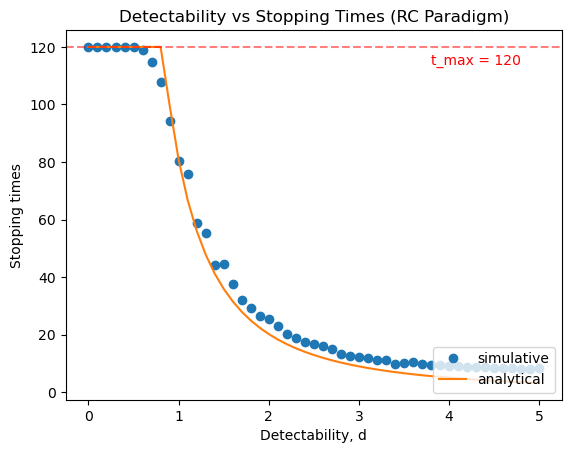

In [71]:
plt.plot(detectabilities, stopping_times, 'o', label='simulative')
plt.plot(detectabilities, analytical_stopping_times, label='analytical')
plt.title('Detectability vs Stopping Times (RC Paradigm)')
plt.xlabel('Detectability, d')
plt.ylabel('Stopping times')
plt.axhline(y=120, color='r', alpha=0.5, linestyle='--')
plt.text(x=3.8, y=114, s='t_max = 120', color='r')
plt.legend(loc=4)

## Some ideas for Further Analysis
1. More epoches (10,000) on RCC remote server
2. Use squences (R+C) ✅
3. Sanity check
   1. ~~Use cumulative score~~
   2. ~~Visualize the change of probability/cumulative score of the target~~
   3. Implement the analytical solution (Figure 4.b see below) ✅

<center><img src="Image/sim_analytical.jpg" style="zoom:40%;"></center>
<caption><center><b>Figure 5</b>: Simulation of Analytical Performance </font></center></caption>

Bug fixing:
- When $d \to 5$, accuracy should converge to $0.9$ (threshold). ✅
- When $d$ is approaching from $1$ to $0$, stopping time should converge to $t_{max}$. ✅